## Part 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

## Part 2

In [6]:
%matplotlib inline

In [8]:
path = r'C:\Users\aaron\Downloads\archive'

In [10]:
df = pd.read_csv(os.path.join(path, 'A6_Data.csv'), index_col = False)

In [12]:
df = df.drop(columns = ['Unnamed: 0'])

In [14]:
df.head()

,world_rank,institution,country,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,average_rank,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,3.57,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,7.14,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,8.00,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,18.71,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,19.57,85.21,2012


In [16]:
# Removing the institution and country columns for being categorical data
df_cl = df.drop(columns = ['institution', 'country'])

In [18]:
df_cl.head()

,world_rank,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,average_rank,score,year
0,1,1,7,9,1,1,1,1,5,3.57,100.00,2012
1,2,2,9,17,3,12,4,4,1,7.14,91.67,2012
2,3,3,17,11,5,4,2,2,15,8.00,89.50,2012
3,4,1,10,24,4,16,16,11,50,18.71,86.17,2012
4,5,4,2,29,7,37,22,22,18,19.57,85.21,2012


In [20]:
df_cl.shape

(2200, 12)

## Part 3

In [24]:
# setting up the elbow technique
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [26]:
score = [kmeans[i].fit(df_cl).score(df_cl) for i in range(len(kmeans))]

C:\Users\aaron\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aaron\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aaron\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aaron\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aaron\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

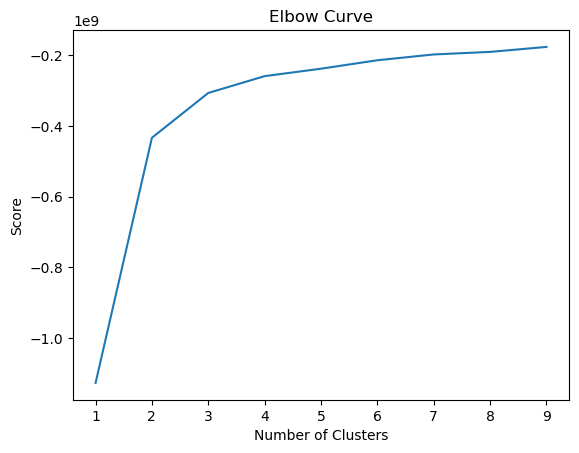

In [28]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## Part 4

For the upcoming k-means algorithm, I'll be using 3 cluster groups. This is because the graph above starts to flatten out after 3 clusters.

## Part 5

In [35]:
# Creating the k-means object
kmeans = KMeans(n_clusters = 3) 

In [37]:
# Fiting the k-means object to the data
kmeans.fit(df_cl)

C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=3)

## Part 6

In [41]:
# Making the cluster group column
df_cl['clusters'] = kmeans.fit_predict(df_cl)

C:\Users\aaron\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [43]:
df_cl.head()

,world_rank,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,average_rank,score,year,clusters
0,1,1,7,9,1,1,1,1,5,3.57,100.00,2012,1
1,2,2,9,17,3,12,4,4,1,7.14,91.67,2012,1
2,3,3,17,11,5,4,2,2,15,8.00,89.50,2012,1
3,4,1,10,24,4,16,16,11,50,18.71,86.17,2012,1
4,5,4,2,29,7,37,22,22,18,19.57,85.21,2012,1


In [45]:
df_cl['clusters'].value_counts()

clusters
0    814
1    699
2    687
Name: count, dtype: int64

## Part 7

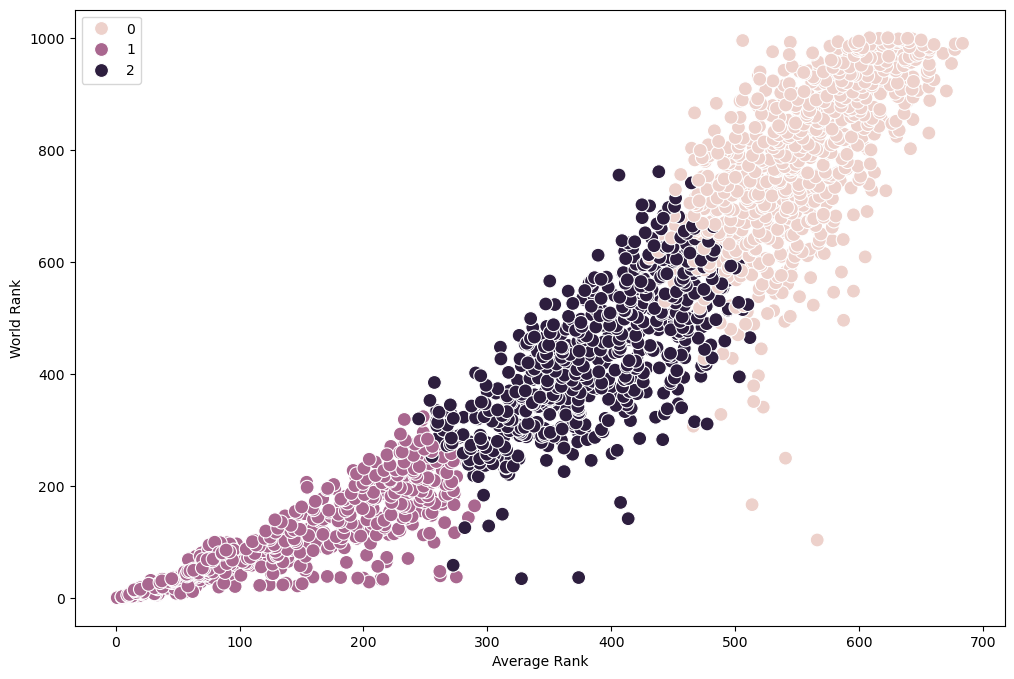

In [49]:
scatter = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['average_rank'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Average Rank') 
plt.ylabel('World Rank') 
plt.show()

In [51]:
scatter.figure.savefig(os.path.join(path, 'Scatterplot With Clusters.png'))

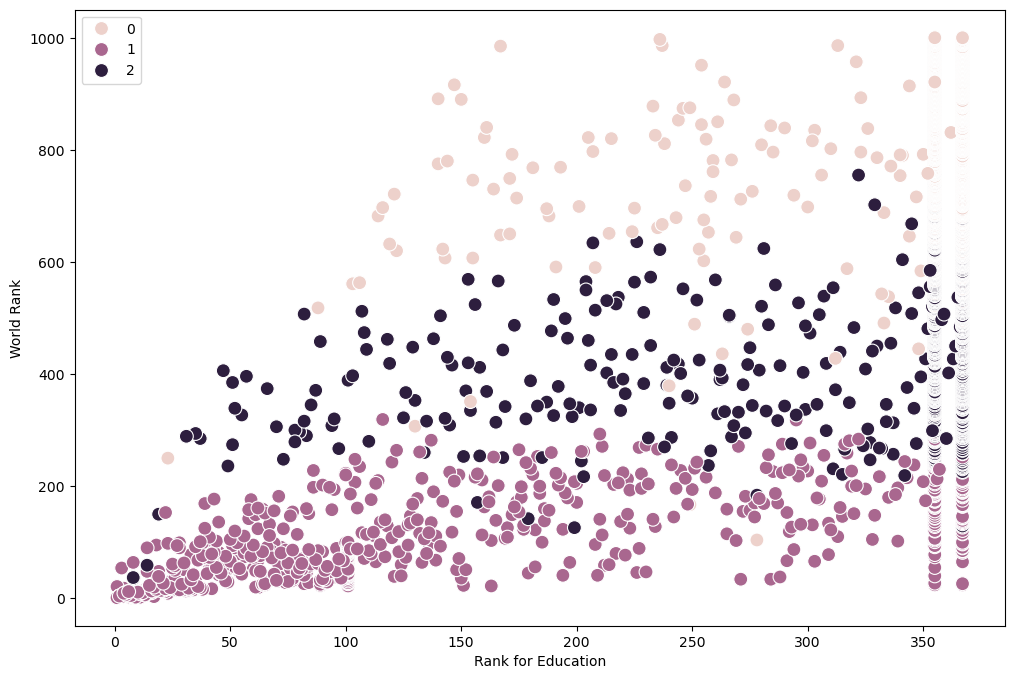

In [51]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['rank_for_education'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rank for Education') 
plt.ylabel('World Rank') 
plt.show()

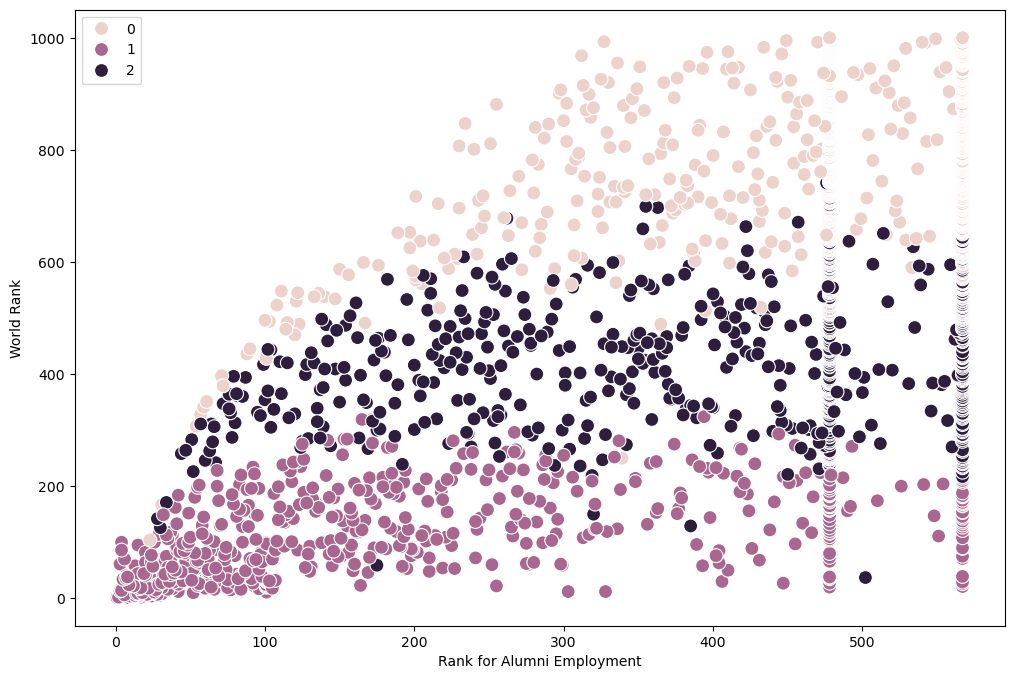

In [53]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['rank_for_alumni_employment'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rank for Alumni Employment') 
plt.ylabel('World Rank') 
plt.show()

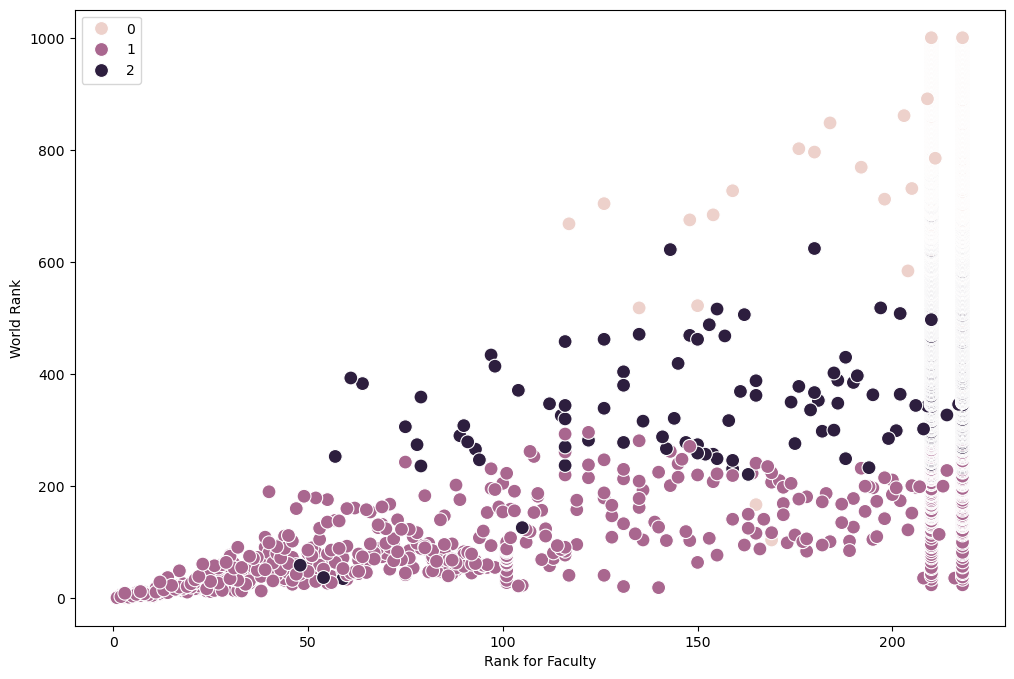

In [55]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['rank_for_faculty'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rank for Faculty') 
plt.ylabel('World Rank') 
plt.show()

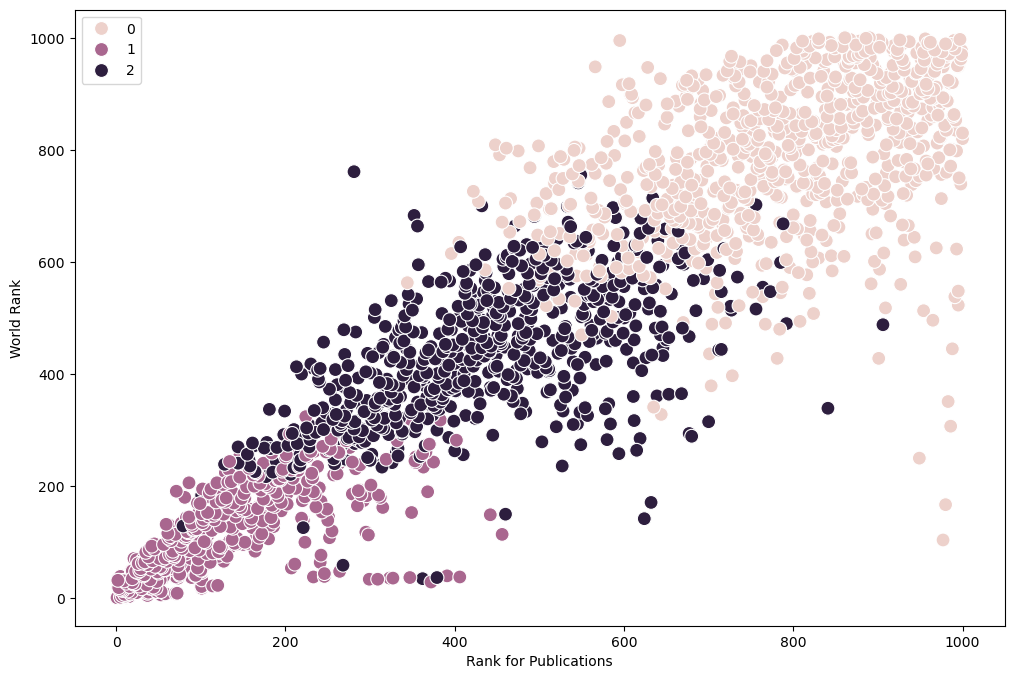

In [57]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['rank_for_publications'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rank for Publications') 
plt.ylabel('World Rank') 
plt.show()

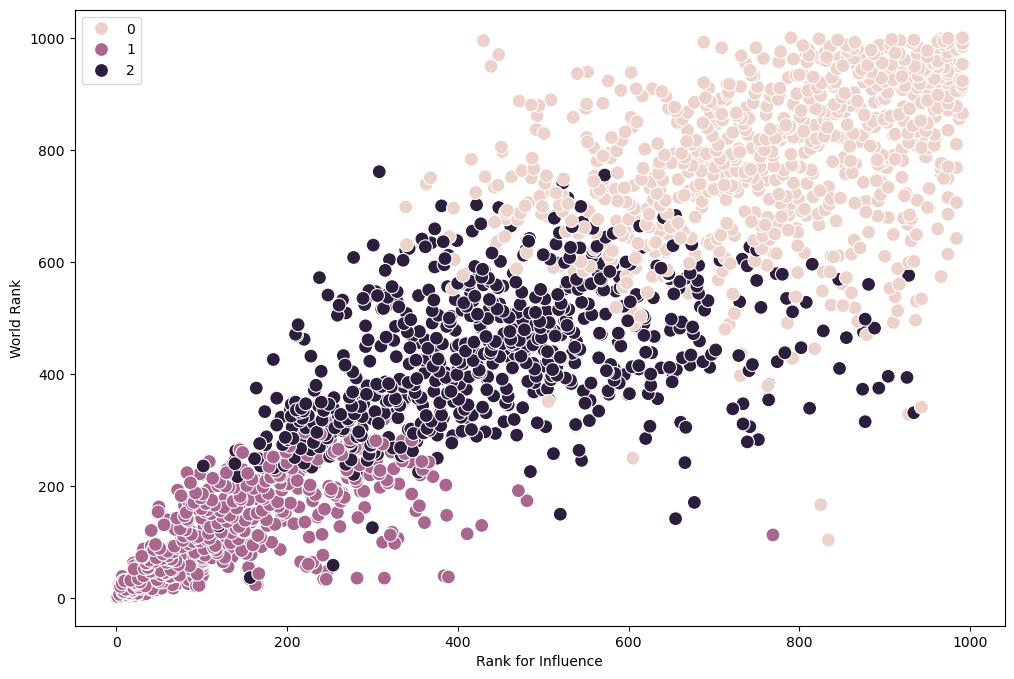

In [59]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['rank_for_influence'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rank for Influence') 
plt.ylabel('World Rank') 
plt.show()

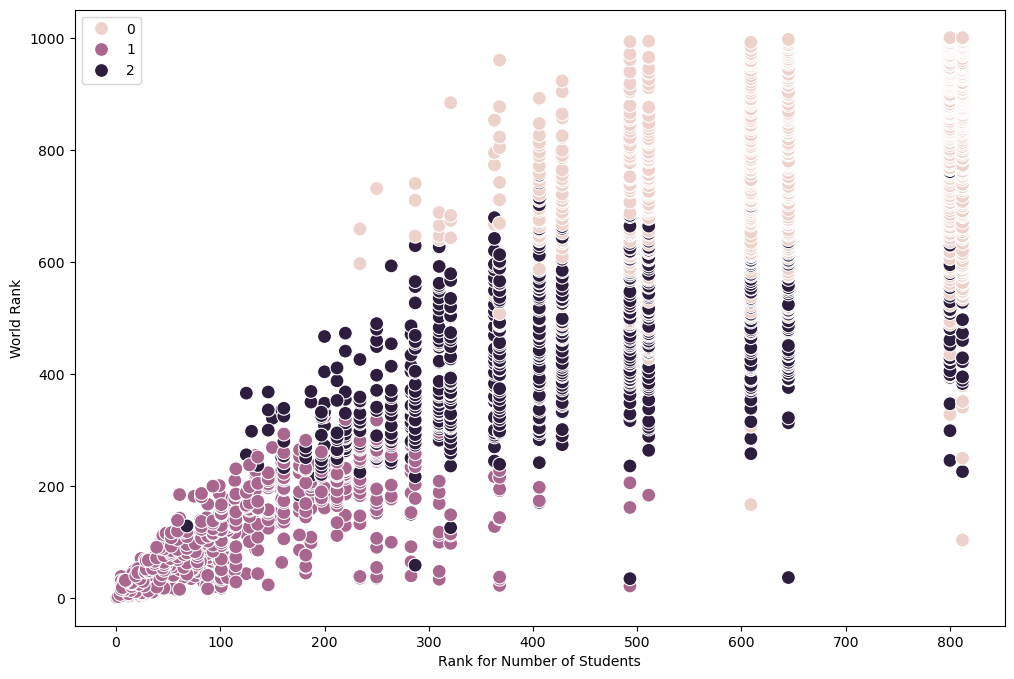

In [61]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['rank_for_number_of_students'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rank for Number of Students') 
plt.ylabel('World Rank') 
plt.show()

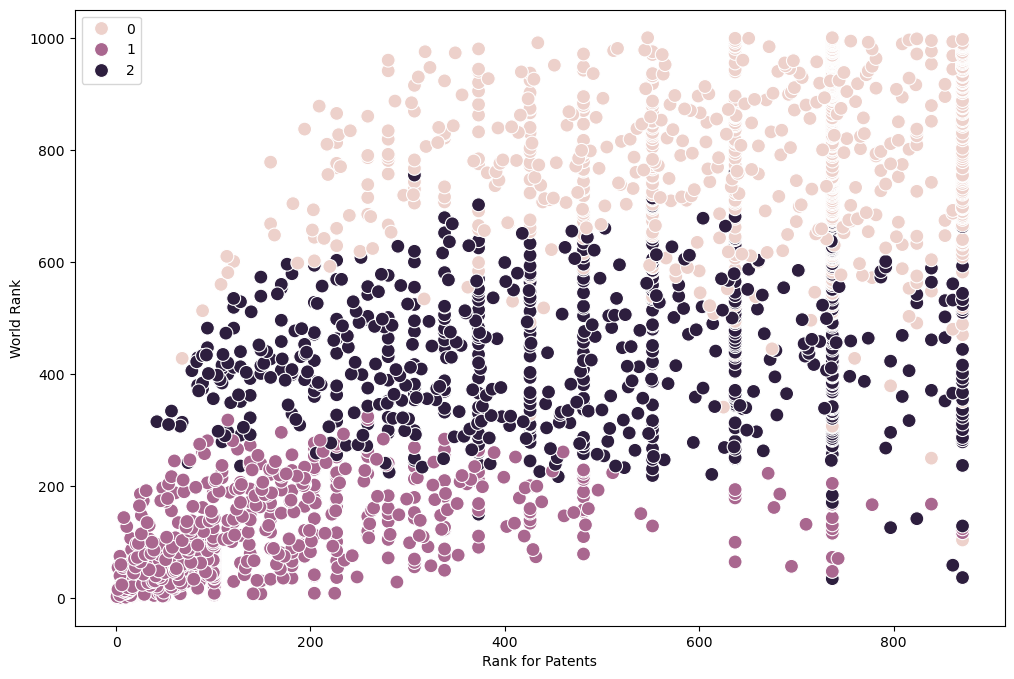

In [63]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cl['rank_for_patents'], y=df_cl['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rank for Patents') 
plt.ylabel('World Rank') 
plt.show()

## Part 8

It's clear that the clusters are seperated by the world rank. Cluster 0 consists of low ranked universities, cluster 2 has middle ranked universities, and cluster 1 has the high ranked universities. One interesting trend that you can see from all of these graphs is that when you compare the world rank to a single criteria, the clusters have a lot of deviation among themselves. Yet the comparison with the average ranks is a lot more uniform. And you can also seperate the clusters with thair average ranks as well. This shows that the average rank has way more impact on the world rank than any single criteria. Another thing to note is that while there are some outliers in the bottom right corner of the first graph, there are none in the upper left corner.

## Part 9

In [70]:
# descriptive statistics of the cluster groups
df_cl.loc[df_cl['clusters'] == 2, 'cluster'] = 'dark purple'
df_cl.loc[df_cl['clusters'] == 1, 'cluster'] = 'purple'
df_cl.loc[df_cl['clusters'] == 0, 'cluster'] = 'pink'

In [72]:
df_cl.groupby('cluster').agg({'world_rank':['mean', 'median'], 
                         'average_rank':['mean', 'median']})

world_rank        average_rank         
                   mean median         mean   median
cluster                                             
dark purple  431.192140  426.0   385.389913  386.430
pink         785.915233  797.0   552.883722  550.215
purple       107.490701   89.0   136.315966  127.430

Matching what I talked about in the last part, this chart shows that pink has the highest amounts in both ranks, purple has the lowest amounts, and dark purple is in the middle.

It's also important to remember that the 1-100 world rank range have data points for 4 years, while ranks 101-1,000 only have data points for 2 years. This can squew the mean and median for the purple cluster.

## Part 10

If you look back to the world rank/average rank graph, you can see that the dark purple and pink clusters have far more deviation in their data points than the purple cluster. I can see a ferther analysis on why that is.

In [79]:
df = df_cl.merge(df, on = ['world_rank', 'national_rank', 'rank_for_education', 'rank_for_alumni_employment', 'rank_for_faculty', 'rank_for_publications', 'rank_for_influence', 'rank_for_number_of_students', 'rank_for_patents', 'average_rank', 'score', 'year'])

In [81]:
df.head()

,world_rank,national_rank,rank_for_education,rank_for_alumni_employment,rank_for_faculty,rank_for_publications,rank_for_influence,rank_for_number_of_students,rank_for_patents,average_rank,score,year,clusters,cluster,institution,country
0,1,1,7,9,1,1,1,1,5,3.57,100.00,2012,1,purple,Harvard University,USA
1,2,2,9,17,3,12,4,4,1,7.14,91.67,2012,1,purple,Massachusetts Institute of Technology,USA
2,3,3,17,11,5,4,2,2,15,8.00,89.50,2012,1,purple,Stanford University,USA
3,4,1,10,24,4,16,16,11,50,18.71,86.17,2012,1,purple,University of Cambridge,United Kingdom
4,5,4,2,29,7,37,22,22,18,19.57,85.21,2012,1,purple,California Institute of Technology,USA


In [83]:
# Exporting data
df.to_csv(os.path.join(path, 'A6_Data_Tab.csv'))